In [1]:
import yaml
import numpy as np
import pandas as pd
from matplotlib import pyplot
from magicctapipe.scripts import event_coincidence

In [2]:
# --- display all columns --- 
pd.set_option('display.max_columns', None)

# --- customize pyplot figure ---
pyplot.rcParams['figure.figsize'] = (12, 9)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

# --- get the default color cycle ---
color_cycle = pyplot.rcParams['axes.prop_cycle'].by_key()['color']

# Settings

In [3]:
input_file_lst = '/fefs/aswg/workspace/analysis-school-2022/lst1_magic/dl1_LST-1.Run03265.0040.h5'

In [4]:
input_file_magic = '/fefs/aswg/workspace/analysis-school-2022/lst1_magic/' \
                   'dl1_magic_run05093711_to_05093714_merged.h5'

In [5]:
output_file = './dl1_lst1_magic_run03265.0040.h5'

In [6]:
config_file = './config.yaml'

with open(config_file, 'rb') as f:
    config = yaml.safe_load(f)

In [7]:
config['event_coincidence']

{'type_lst_time': 'dragon_time',
 'window_width': 6e-07,
 'offset_start': -5e-06,
 'offset_stop': 0.0}

# Process the input data

In [8]:
event_coincidence(input_file_lst, input_file_magic, output_file, config)


Configuration for the event coincidence:
{'type_lst_time': 'dragon_time', 'window_width': 6e-07, 'offset_start': -5e-06, 'offset_stop': 0.0}

Loading the LST-1 data file:
/fefs/aswg/workspace/analysis-school-2022/lst1_magic/dl1_LST-1.Run03265.0040.h5
LST-1: 53000 events

Dropping the non-reconstructed events...
--> LST-1: 39367 events

Loading the MAGIC data file:
/fefs/aswg/workspace/analysis-school-2022/lst1_magic/dl1_magic_run05093711_to_05093714_merged.h5
M1: 647148 events
M2: 696520 events

Extracting the M1 events within the LST-1 observation time window...
--> 1679 events are found. Checking the event coincidence...

time offset: -5.0 [us]  -->  0 events
time offset: -4.9 [us]  -->  0 events
time offset: -4.8 [us]  -->  0 events
time offset: -4.7 [us]  -->  1 events
time offset: -4.6 [us]  -->  1 events
time offset: -4.5 [us]  -->  1 events
time offset: -4.4 [us]  -->  1 events
time offset: -4.3 [us]  -->  1 events
time offset: -4.2 [us]  -->  1 events
time offset: -4.1 [us]  -

# Check the output data

In [9]:
data = pd.read_hdf(output_file, key='events/params')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [10]:
data.head(10)

obs_id_lst  event_id_lst    intensity         x  \
obs_id  event_id tel_id                                                    
5093711 76344    2              NaN           NaN    70.200976 -0.223957   
                 3              NaN           NaN    74.312500 -0.107275   
        76345    1           3265.0     2120035.0   169.430605 -0.071064   
                 2              NaN           NaN   130.000000  0.028855   
                 3              NaN           NaN   112.401042 -0.043045   
        76346    1           3265.0     2120050.0  1315.858954  0.034456   
                 2              NaN           NaN   123.957031  0.004482   
                 3              NaN           NaN   176.835938  0.009097   
        76347    2              NaN           NaN    52.109375  0.183424   
                 3              NaN           NaN    65.992188 -0.037027   

                                y         r         phi    length     width  \
obs_id  event_id tel_id                                                       
5093711 76344    2      -0.105213  0.247440 -154.836178  0.031845  0.013492   
                 3       0.264665  0.285580  112.063916  0.025185  0.017131   
        76345    1       0.042055  0.082575  149.383378  0.039634  0.023464   
                 2      -0.021926  0.036241  -37.230119  0.082103  0.023619   
                 3       0.002628  0.043125  176.506871  0.080488  0.014664   
        76346    1       0.240265  0.242723   81.838955  0.266748  0.167507   
                 2       0.061934  0.062096   85.860524  0.177439  0.064504   
                 3       0.070195  0.070782   82.615859  0.134871  0.086434   
        76347    2       0.168197  0.248866   42.520373  0.018756  0.012734   
                 3      -0.073436  0.082243 -116.757453  0.021237  0.016089   

                               psi  skewness  kurtosis      slope  intercept  \
obs_id  event_id tel_id                                                        
5093711 76344    2      -76.522975 -0.104281  2.004080  -3.467450  24.622008   
                 3      -85.021328  0.333280  2.176815 -21.548397  25.798995   
        76345    1      -68.351884 -0.302409  3.271540  -9.059055  17.696285   
                 2       80.209317 -0.422864  1.547722   6.036241  21.421722   
                 3       -8.534323 -0.558910  1.595304  17.973012  22.793388   
        76346    1      -22.395284  0.420115  1.430736 -14.355683  23.699092   
                 2       59.431907 -0.410988  1.603990   4.548442  25.425418   
                 3       70.016068 -0.566682  1.856647  -0.627571  29.918188   
        76347    2       80.024583  0.205915  2.051027  13.243040  25.918538   
                 3       17.081865 -0.751384  3.881297 -51.603865  28.270839   

                         intensity_width_1  intensity_width_2  pixels_width_1  \
obs_id  event_id tel_id                                                         
5093711 76344    2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76345    1                     0.0                0.0             0.0   
                 2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76346    1                     0.0                0.0             0.0   
                 2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76347    2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   

                         pixels_width_2  n_pixels  n_islands   alt_tel  \
obs_id  event_id tel_id                                                  
5093711 76344    2                  0.0         9          1  0.720401   
       

In [11]:
data.columns

Index(['obs_id_lst', 'event_id_lst', 'intensity', 'x', 'y', 'r', 'phi',
       'length', 'width', 'psi', 'skewness', 'kurtosis', 'slope', 'intercept',
       'intensity_width_1', 'intensity_width_2', 'pixels_width_1',
       'pixels_width_2', 'n_pixels', 'n_islands', 'alt_tel', 'az_tel',
       'timestamp', 'multiplicity'],
      dtype='object')

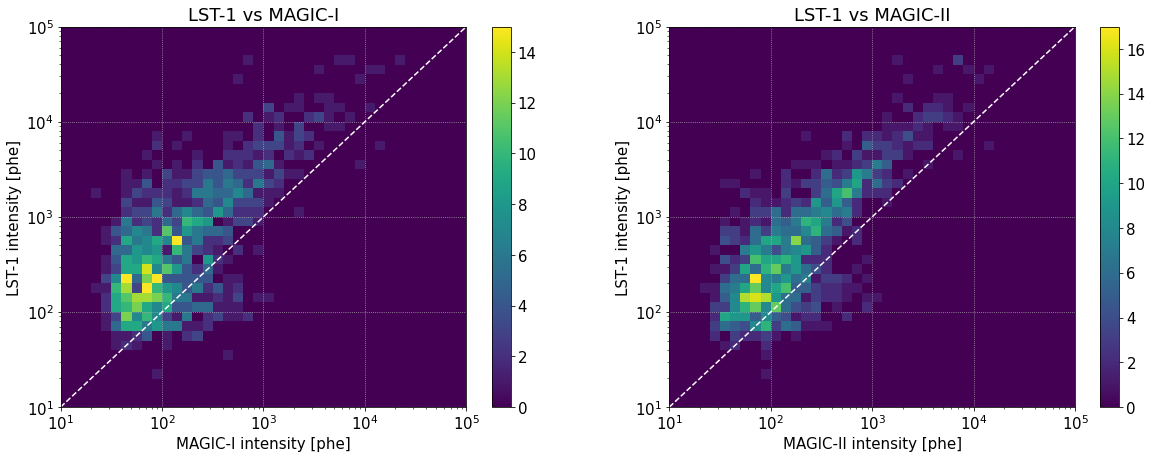

In [12]:
pyplot.figure(figsize=(20, 7))
grid = (1, 2)

df = data.query('multiplicity == 3')

for i_grid, (tel_name, tel_id) in enumerate(zip(['MAGIC-I', 'MAGIC-II'], [2, 3])):
    
    pyplot.subplot2grid(grid, (0, i_grid))
    pyplot.title(f'LST-1 vs {tel_name}')
    pyplot.xlabel(f'{tel_name} intensity [phe]')
    pyplot.ylabel('LST-1 intensity [phe]')
    pyplot.loglog()
    
    pyplot.hist2d(
        df.query(f'tel_id == {tel_id}')['intensity'].to_numpy(),
        df.query(f'tel_id == 1')['intensity'].to_numpy(),
        bins=np.logspace(1, 5, 41)
    )
    
    pyplot.plot((1e1, 1e5), (1e1, 1e5), linestyle='--', color='white')
    
    pyplot.colorbar()
    
    pyplot.grid()

In [13]:
df_profile = pd.read_hdf(output_file, key='coincidence/profile')

In [14]:
df_profile

,offset_usec,n_coincidence_lst1_m1,n_coincidence_btwn_lst1_m1,n_coincidence_lst1_m2,n_coincidence_btwn_lst1_m2
0,-5.0,0,0,0,0
1,-4.9,0,0,0,0
2,-4.8,0,0,0,0
3,-4.7,1,1,0,0
4,-4.6,1,1,0,0
5,-4.5,1,1,1,1
6,-4.4,1,1,1,1
7,-4.3,1,1,2,2
8,-4.2,1,1,2,2
9,-4.1,1,0,2,2


In [15]:
df_features = pd.read_hdf(output_file, key='coincidence/features')

In [16]:
df_features

,tel_combo,mean_time_unix,mean_alt_lst,mean_alt_magic,mean_az_lst,mean_az_magic,offset_avg_usec,n_coincidence,n_magic
0,lst1_m1,1.608068e+09,0.720798,0.720728,1.477645,1.477663,-3.257327,1243,1679
0,lst1_m2,1.608068e+09,0.720796,0.720746,1.477644,1.477647,-3.133553,1387,1828


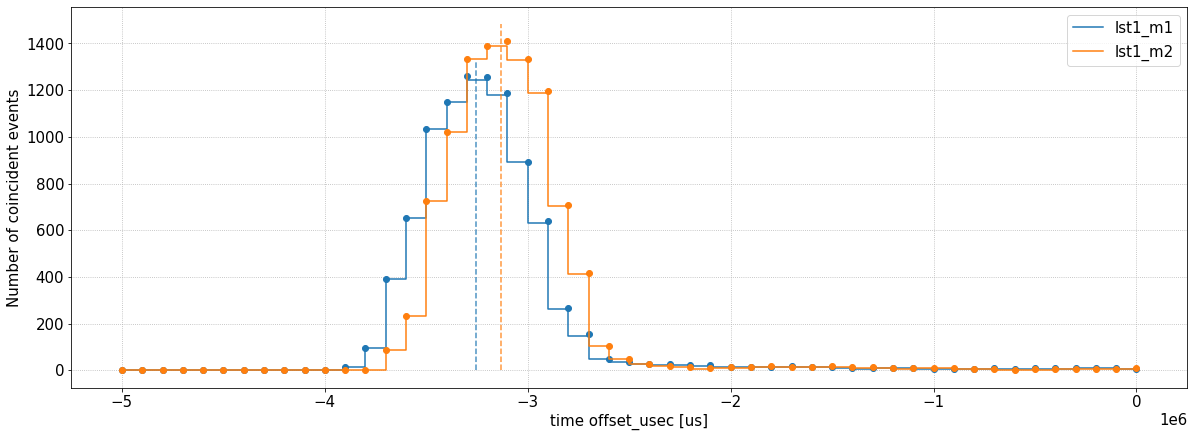

In [17]:
pyplot.figure(figsize=(20, 7))
pyplot.xlabel('time offset_usec [us]')
pyplot.ylabel('Number of coincident events')

sec2us = 1e6

for i_tel, tel_combo in enumerate(['lst1_m1', 'lst1_m2']):

    pyplot.plot(
        df_profile['offset_usec'].values * sec2us, df_profile[f'n_coincidence_{tel_combo}'].values, 
        linestyle="None", marker='o', color=color_cycle[i_tel]
    )
    
    pyplot.step(
        df_profile['offset_usec'].values * sec2us, df_profile[f'n_coincidence_btwn_{tel_combo}'].values, 
        where='post', color=color_cycle[i_tel], label=tel_combo
    )
    
    offset_usec_avg = df_features.query(f'tel_combo == "{tel_combo}"')['offset_avg_usec'].values * sec2us
    
    pyplot.plot(
        np.repeat(offset_usec_avg, 2), (0, pyplot.ylim()[1]), linestyle='--', alpha=0.8, color=color_cycle[i_tel]
    )

pyplot.grid()
pyplot.legend()